# Fun with FFT

Charles Boncelet, boncelet@udel.edu

In [1]:
%pylab inline
from scipy.fftpack import fft, ifft

Populating the interactive namespace from numpy and matplotlib


In [2]:
fft?

In [3]:
x = array([1,-1,1,-1])
fft(x)

array([0.+0.j, 0.+0.j, 4.+0.j, 0.-0.j])

In [4]:
fft(x,n=8)

array([0.+0.j        , 1.+0.41421356j, 0.-0.j        , 1.+2.41421356j,
       4.+0.j        , 1.-2.41421356j, 0.+0.j        , 1.-0.41421356j])

In [5]:
xz = r_[x,zeros(4)] # numpy.r_  Translates slice objects to concatenation along the first axis.
        # This is a simple way to build up arrays quickly.
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html
xz

array([ 1., -1.,  1., -1.,  0.,  0.,  0.,  0.])

In [6]:
fft(xz)

array([0.+0.j        , 1.+0.41421356j, 0.-0.j        , 1.+2.41421356j,
       4.+0.j        , 1.-2.41421356j, 0.+0.j        , 1.-0.41421356j])

In [7]:
c_[x,zeros(4)] # numpy.c_  Translates slice objects to concatenation along the second axis.
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html

array([[ 1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [-1.,  0.]])

In [8]:
y = fft(x)
xhat = ifft(y)

In [9]:
x-xhat

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [10]:
x2 = rand(1024*1024)
y2 = fft(x2)
x2hat = ifft(y2)
r = x2-x2hat
r[:10]

array([-2.22044605e-16+0.00000000e+00j, -1.11022302e-16-6.34393796e-17j,
        0.00000000e+00+1.38955964e-17j, -1.11022302e-16+1.57209315e-18j,
       -2.22044605e-16-3.46944695e-17j, -3.33066907e-16+4.57126741e-17j,
       -1.11022302e-16+6.15377698e-17j, -1.11022302e-16-1.06333128e-16j,
        0.00000000e+00+8.95872825e-17j, -2.22044605e-16+3.29425557e-18j])

In [11]:
max(abs(x2-x2hat))

1.14311790434066e-15

In [12]:
x2hat[:10]

array([0.94917934+0.00000000e+00j, 0.01509826+6.34393796e-17j,
       0.7719761 -1.38955964e-17j, 0.13580052-1.57209315e-18j,
       0.42608547+3.46944695e-17j, 0.95827148-4.57126741e-17j,
       0.74273124-6.15377698e-17j, 0.15562065+1.06333128e-16j,
       0.75784045-8.95872825e-17j, 0.08612708-3.29425557e-18j])

In [13]:
real(x2hat)[:10]

array([0.94917934, 0.01509826, 0.7719761 , 0.13580052, 0.42608547,
       0.95827148, 0.74273124, 0.15562065, 0.75784045, 0.08612708])

(0, 8)

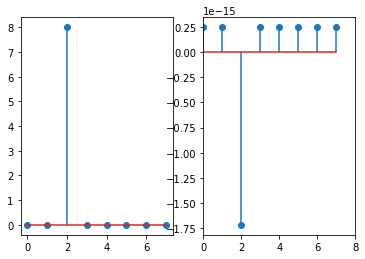

In [17]:
#x = array([0,0,0,1,0,0,0,0]) + 1j*array([0,0,0,0,0,0,0,0])
x = exp(1j*2*2*pi*arange(8)/8)
y = fft(x)
subplot(1,2,1)
stem(real(y),use_line_collection=True)
subplot(1,2,2)
stem(imag(y),use_line_collection=True)
xlim([0,8])

<StemContainer object of 3 artists>

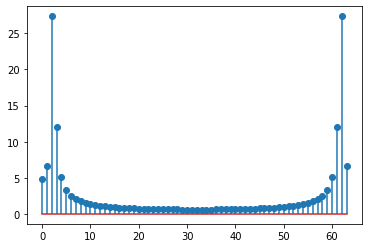

In [19]:
import matplotlib.pyplot as plt
N=64
omega = 2.3*2*pi/N
n = arange(N)
x = cos(omega*n)
y = fft(x)
#plt.plot(n,x)
stem(abs(y),use_line_collection=True)

## Signal Filtering with FFTs

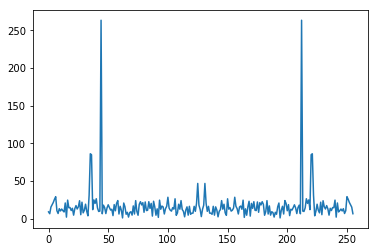

In [18]:
N=256
sigma = 1.0
omega = 2*pi*35.5/N
omega2 = 2*pi*44/N
#x = exp(omega*1j*arange(N))
x = cos(omega*arange(N))+2*cos(omega2*arange(N))
x += sigma*randn(N)
y = fft(x)
plot(abs(y))

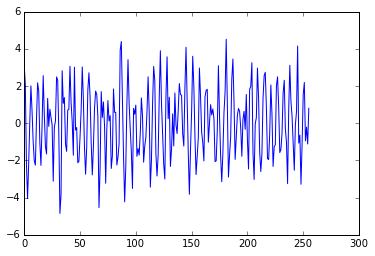

In [18]:
plot(x)

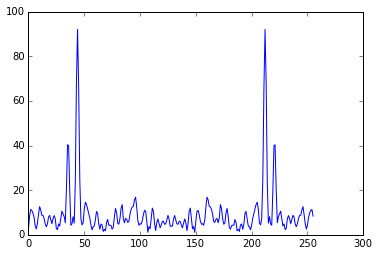

In [19]:
from scipy.signal import kaiser
window = kaiser(N,beta=14)
plot(abs(fft(x*window)))

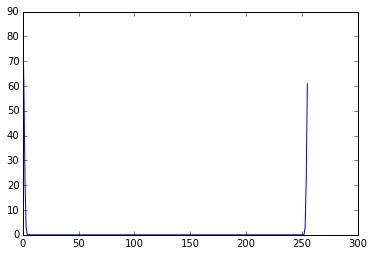

In [20]:
plot(abs(fft(window)))

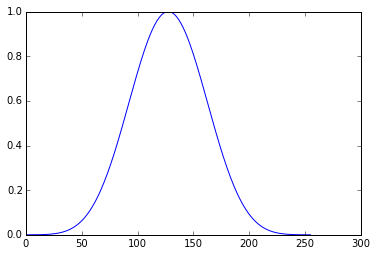

In [21]:
plot(window)